In [7]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [8]:
def generate_data(n_samples=1000):
    X = torch.linspace(-3, 3, n_samples).reshape(-1, 1)
    y = X**3 + 0.3 * torch.randn(n_samples, 1)
    return X, y


In [9]:
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(1, 50)
        self.fc2 = nn.Linear(50, 50)
        self.fc3 = nn.Linear(50, 1)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [10]:
class EarlyStopping:
    def __init__(self, patience=5, restore_best_weights=True):
        self.patience = patience
        self.restore_best_weights = restore_best_weights
        self.best_loss = float('inf')
        self.patience_counter = 0
        self.best_weights = None

    def __call__(self, val_loss, model):
        if val_loss < self.best_loss:
            self.best_loss = val_loss
            self.patience_counter = 0
            if self.restore_best_weights:
                self.best_weights = model.state_dict()
        else:
            self.patience_counter += 1
            if self.patience_counter >= self.patience:
                if self.restore_best_weights and self.best_weights:
                    model.load_state_dict(self.best_weights)
                return True
        return False


In [12]:
def train_model(model, criterion, optimizer, train_loader, val_loader, num_epochs=500):
    early_stopping = EarlyStopping(patience=5, restore_best_weights=True)

    train_losses, val_losses = [], []
    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        for inputs, targets in train_loader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            loss.backward()
            optimizer.step()
            running_loss += loss.item() * inputs.size(0)
        train_loss = running_loss / len(train_loader.dataset)

        model.eval()
        running_loss = 0.0
        with torch.no_grad():
            for inputs, targets in val_loader:
                outputs = model(inputs)
                loss = criterion(outputs, targets)
                running_loss += loss.item() * inputs.size(0)
        val_loss = running_loss / len(val_loader.dataset)

        train_losses.append(train_loss)
        val_losses.append(val_loss)

        if early_stopping(val_loss, model):
            print(f"Early stopping triggered at epoch {epoch}")
            break

        if epoch % 50 == 0:
            print(f'Epoch [{epoch}/{num_epochs}], Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}')

    return train_losses, val_losses

In [13]:
def plot_losses(train_losses, val_losses, title):
    plt.plot(train_losses, label='Train Loss')
    plt.plot(val_losses, label='Validation Loss')
    plt.title(title)
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

Training model with early stopping...
Epoch [0/500], Train Loss: 36.0136, Val Loss: 19.8911
Early stopping triggered at epoch 18


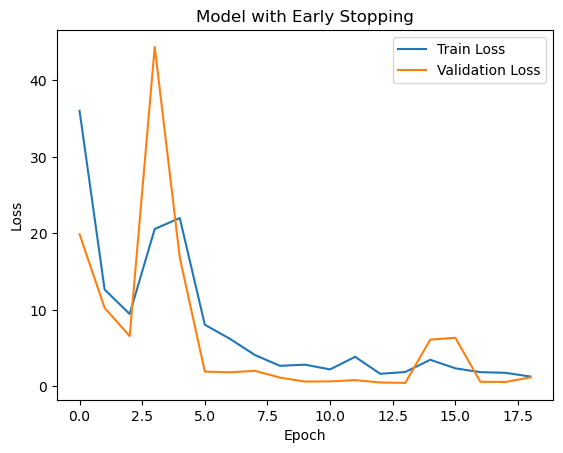

In [14]:
X, y = generate_data()
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Create data loaders
train_loader = torch.utils.data.DataLoader(torch.utils.data.TensorDataset(X_train, y_train), batch_size=32, shuffle=True)
val_loader = torch.utils.data.DataLoader(torch.utils.data.TensorDataset(X_val, y_val), batch_size=32, shuffle=False)

# Train and evaluate the model with early stopping
model = SimpleNN()
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)
print("Training model with early stopping...")
train_losses, val_losses = train_model(model, criterion, optimizer, train_loader, val_loader)
plot_losses(train_losses, val_losses, "Model with Early Stopping")

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Generate synthetic dataset
def generate_data(n_samples=1000):
    X = torch.linspace(-3, 3, n_samples).reshape(-1, 1)
    y = X**3 + 0.3 * torch.randn(n_samples, 1)
    return X, y

# Define a simple neural network
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(1, 50)
        self.fc2 = nn.Linear(50, 50)
        self.fc3 = nn.Linear(50, 1)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Early stopping class
class EarlyStopping:
    def __init__(self, patience=5, restore_best_weights=True):
        self.patience = patience
        self.restore_best_weights = restore_best_weights
        self.best_loss = float('inf')
        self.patience_counter = 0
        self.best_weights = None

    def __call__(self, val_loss, model):
        if val_loss < self.best_loss:
            self.best_loss = val_loss
            self.patience_counter = 0
            if self.restore_best_weights:
                self.best_weights = model.state_dict()
        else:
            self.patience_counter += 1
            if self.patience_counter >= self.patience:
                if self.restore_best_weights and self.best_weights:
                    model.load_state_dict(self.best_weights)
                return True
        return False


In [2]:
def train_model(model, criterion, optimizer, train_loader, val_loader, num_epochs=500):
    early_stopping = EarlyStopping(patience=5, restore_best_weights=True)

    train_losses, val_losses = [], []
    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        for inputs, targets in train_loader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            loss.backward()
            optimizer.step()
            running_loss += loss.item() * inputs.size(0)
        train_loss = running_loss / len(train_loader.dataset)

        model.eval()
        running_loss = 0.0
        with torch.no_grad():
            for inputs, targets in val_loader:
                outputs = model(inputs)
                loss = criterion(outputs, targets)
                running_loss += loss.item() * inputs.size(0)
        val_loss = running_loss / len(val_loader.dataset)

        train_losses.append(train_loss)
        val_losses.append(val_loss)

        if early_stopping(val_loss, model):
            print(f"Early stopping triggered at epoch {epoch}")
            break

        if epoch % 50 == 0:
            print(f'Epoch [{epoch}/{num_epochs}], Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}')

    return train_losses, val_losses


In [3]:
def plot_losses(train_losses, val_losses, title):
    plt.plot(train_losses, label='Train Loss')
    plt.plot(val_losses, label='Validation Loss')
    plt.title(title)
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

# Generate data
X, y = generate_data()
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Create data loaders
train_loader = torch.utils.data.DataLoader(torch.utils.data.TensorDataset(X_train, y_train), batch_size=32, shuffle=True)
val_loader = torch.utils.data.DataLoader(torch.utils.data.TensorDataset(X_val, y_val), batch_size=32, shuffle=False)


Training model with early stopping...
Epoch [0/500], Train Loss: 33.8124, Val Loss: 14.5311
Early stopping triggered at epoch 12


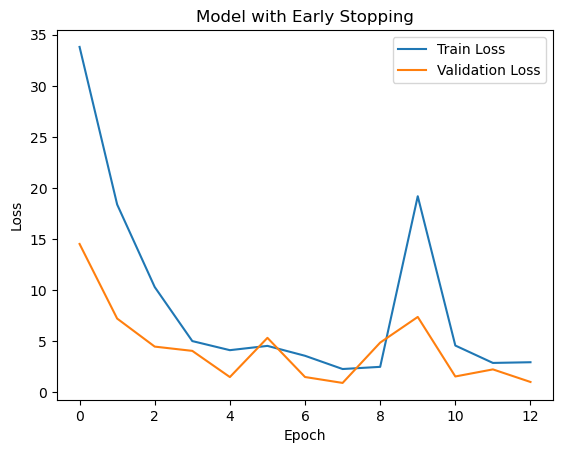

In [4]:
model = SimpleNN()
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)
print("Training model with early stopping...")
train_losses, val_losses = train_model(model, criterion, optimizer, train_loader, val_loader)
plot_losses(train_losses, val_losses, "Model with Early Stopping")

Training model without early stopping...
Epoch [0/500], Train Loss: 31.2736, Val Loss: 26.3808
Epoch [50/500], Train Loss: 0.2434, Val Loss: 0.2079
Epoch [100/500], Train Loss: 0.1443, Val Loss: 0.1268
Epoch [150/500], Train Loss: 0.4671, Val Loss: 0.2050
Epoch [200/500], Train Loss: 0.1452, Val Loss: 0.1551
Epoch [250/500], Train Loss: 0.5102, Val Loss: 0.0919
Epoch [300/500], Train Loss: 0.1794, Val Loss: 0.0905
Epoch [350/500], Train Loss: 0.1249, Val Loss: 0.0967
Epoch [400/500], Train Loss: 0.2021, Val Loss: 0.7478
Epoch [450/500], Train Loss: 0.2008, Val Loss: 0.4327
Training model with early stopping...
Epoch [0/500], Train Loss: 34.8695, Val Loss: 25.1440
Early stopping triggered at epoch 36


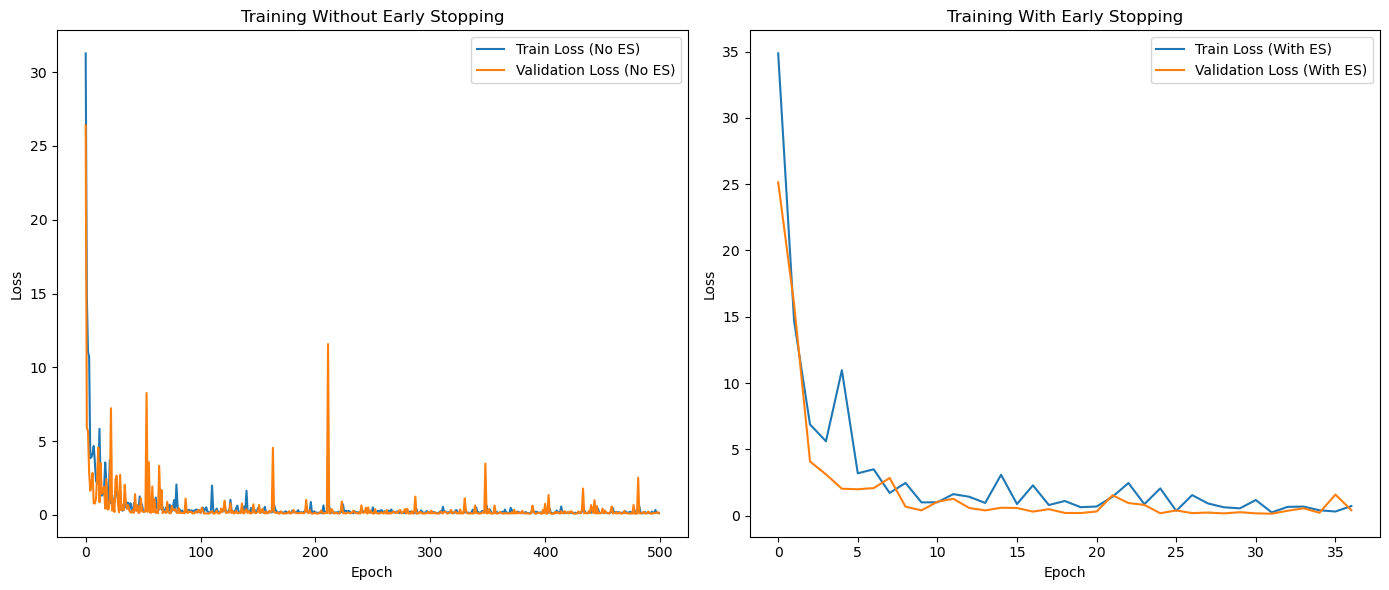

In [5]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Generate synthetic dataset
def generate_data(n_samples=1000):
    X = torch.linspace(-3, 3, n_samples).reshape(-1, 1)
    y = X**3 + 0.3 * torch.randn(n_samples, 1)
    return X, y

# Define a simple neural network
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(1, 50)
        self.fc2 = nn.Linear(50, 50)
        self.fc3 = nn.Linear(50, 1)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Early stopping class
class EarlyStopping:
    def __init__(self, patience=5, restore_best_weights=True):
        self.patience = patience
        self.restore_best_weights = restore_best_weights
        self.best_loss = float('inf')
        self.patience_counter = 0
        self.best_weights = None

    def __call__(self, val_loss, model):
        if val_loss < self.best_loss:
            self.best_loss = val_loss
            self.patience_counter = 0
            if self.restore_best_weights:
                self.best_weights = model.state_dict()
        else:
            self.patience_counter += 1
            if self.patience_counter >= self.patience:
                if self.restore_best_weights and self.best_weights:
                    model.load_state_dict(self.best_weights)
                return True
        return False

# Training function without early stopping
def train_model_no_es(model, criterion, optimizer, train_loader, val_loader, num_epochs=500):
    train_losses, val_losses = [], []
    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        for inputs, targets in train_loader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            loss.backward()
            optimizer.step()
            running_loss += loss.item() * inputs.size(0)
        train_loss = running_loss / len(train_loader.dataset)

        model.eval()
        running_loss = 0.0
        with torch.no_grad():
            for inputs, targets in val_loader:
                outputs = model(inputs)
                loss = criterion(outputs, targets)
                running_loss += loss.item() * inputs.size(0)
        val_loss = running_loss / len(val_loader.dataset)

        train_losses.append(train_loss)
        val_losses.append(val_loss)

        if epoch % 50 == 0:
            print(f'Epoch [{epoch}/{num_epochs}], Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}')

    return train_losses, val_losses

# Training function with early stopping
def train_model_with_es(model, criterion, optimizer, train_loader, val_loader, num_epochs=500):
    early_stopping = EarlyStopping(patience=5, restore_best_weights=True)

    train_losses, val_losses = [], []
    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        for inputs, targets in train_loader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            loss.backward()
            optimizer.step()
            running_loss += loss.item() * inputs.size(0)
        train_loss = running_loss / len(train_loader.dataset)

        model.eval()
        running_loss = 0.0
        with torch.no_grad():
            for inputs, targets in val_loader:
                outputs = model(inputs)
                loss = criterion(outputs, targets)
                running_loss += loss.item() * inputs.size(0)
        val_loss = running_loss / len(val_loader.dataset)

        train_losses.append(train_loss)
        val_losses.append(val_loss)

        if early_stopping(val_loss, model):
            print(f"Early stopping triggered at epoch {epoch}")
            break

        if epoch % 50 == 0:
            print(f'Epoch [{epoch}/{num_epochs}], Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}')

    return train_losses, val_losses

# Plot function
def plot_losses(train_losses_no_es, val_losses_no_es, train_losses_es, val_losses_es):
    plt.figure(figsize=(14, 6))

    # Plot without early stopping
    plt.subplot(1, 2, 1)
    plt.plot(train_losses_no_es, label='Train Loss (No ES)')
    plt.plot(val_losses_no_es, label='Validation Loss (No ES)')
    plt.title('Training Without Early Stopping')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    # Plot with early stopping
    plt.subplot(1, 2, 2)
    plt.plot(train_losses_es, label='Train Loss (With ES)')
    plt.plot(val_losses_es, label='Validation Loss (With ES)')
    plt.title('Training With Early Stopping')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Generate data
X, y = generate_data()
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Create data loaders
train_loader = torch.utils.data.DataLoader(torch.utils.data.TensorDataset(X_train, y_train), batch_size=32, shuffle=True)
val_loader = torch.utils.data.DataLoader(torch.utils.data.TensorDataset(X_val, y_val), batch_size=32, shuffle=False)

# Train and evaluate the model without early stopping
model_no_es = SimpleNN()
criterion = nn.MSELoss()
optimizer = optim.SGD(model_no_es.parameters(), lr=0.01)
print("Training model without early stopping...")
train_losses_no_es, val_losses_no_es = train_model_no_es(model_no_es, criterion, optimizer, train_loader, val_loader)

# Train and evaluate the model with early stopping
model_es = SimpleNN()
optimizer = optim.SGD(model_es.parameters(), lr=0.01)
print("Training model with early stopping...")
train_losses_es, val_losses_es = train_model_with_es(model_es, criterion, optimizer, train_loader, val_loader)

# Plot both scenarios
plot_losses(train_losses_no_es, val_losses_no_es, train_losses_es, val_losses_es)
